In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [17]:
def calculate_time_domain_features(df):
    features = [
        df['accelerometer_X'].mean(),
        df['accelerometer_Y'].mean(),
        df['accelerometer_Z'].mean(),
        df['accelerometer_X'].std(),
        df['accelerometer_Y'].std(),
        df['accelerometer_Z'].std(),
        df['accelerometer_X'].min(),
        df['accelerometer_Y'].min(),
        df['accelerometer_Z'].min(),
        df['accelerometer_X'].max(),
        df['accelerometer_Y'].max(),
        df['accelerometer_Z'].max()
    ]
    return features

def combine_csv_files(file_list):
    df_list = []

    for file in file_list:
        df = pd.read_csv(file)
        features = calculate_time_domain_features(df)
        df['mean_X'] = features[0]
        df['mean_Y'] = features[1]
        df['mean_Z'] = features[2]
        df['std_X'] = features[3]
        df['std_Y'] = features[4]
        df['std_Z'] = features[5]
        df['min_X'] = features[6]
        df['min_Y'] = features[7]
        df['min_Z'] = features[8]
        df['max_X'] = features[9]
        df['max_Y'] = features[10]
        df['max_Z'] = features[11]
        df_list.append(df)

    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

In [18]:
path_idle = 'data/idle/*.csv'
path_running = 'data/running/*.csv'
path_stairs = 'data/stairs/*.csv'
path_walking = 'data/walking/*.csv'

idle_file_list = glob.glob(path_idle)
running_file_list = glob.glob(path_running)
stairs_file_list = glob.glob(path_stairs)
walking_file_list = glob.glob(path_walking)

idle_combined_df = combine_csv_files(idle_file_list)
running_combined_df = combine_csv_files(running_file_list)
stairs_combined_df = combine_csv_files(stairs_file_list)
walking_combined_df = combine_csv_files(walking_file_list)

print(idle_combined_df.head())
print(running_combined_df.head())
print(stairs_combined_df.head())
print(walking_combined_df.head())

   accelerometer_X  accelerometer_Y  accelerometer_Z    mean_X    mean_Y  \
0         1.000776         4.616021         8.576031  0.178448  0.167435   
1         0.718261         4.209007         8.446744  0.178448  0.167435   
2        -0.909797        -0.282516         9.203311  0.178448  0.167435   
3         5.099650         0.148441         8.418014  0.178448  0.167435   
4         1.762132        -0.162806         9.251195  0.178448  0.167435   

     mean_Z     std_X     std_Y     std_Z     min_X     min_Y     min_Z  \
0  9.605697  1.036361  1.157603  0.406903 -0.909797 -0.282516  8.418014   
1  9.605697  1.036361  1.157603  0.406903 -0.909797 -0.282516  8.418014   
2  9.605697  1.036361  1.157603  0.406903 -0.909797 -0.282516  8.418014   
3  9.605697  1.036361  1.157603  0.406903 -0.909797 -0.282516  8.418014   
4  9.605697  1.036361  1.157603  0.406903 -0.909797 -0.282516  8.418014   

     max_X     max_Y    max_Z  
0  5.09965  4.616021  9.80665  
1  5.09965  4.616021  9.8066

In [13]:
time_domain_features = [
    idle_combined_df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z', 'mean_X', 'mean_Y', 'mean_Z', 'std_X', 'std_Y', 'std_Z', 'min_X', 'min_Y', 'min_Z', 'max_X', 'max_Y', 'max_Z']],
    running_combined_df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z', 'mean_X', 'mean_Y', 'mean_Z', 'std_X', 'std_Y', 'std_Z', 'min_X', 'min_Y', 'min_Z', 'max_X', 'max_Y', 'max_Z']],
    stairs_combined_df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z', 'mean_X', 'mean_Y', 'mean_Z', 'std_X', 'std_Y', 'std_Z', 'min_X', 'min_Y', 'min_Z', 'max_X', 'max_Y', 'max_Z']],
    walking_combined_df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z','mean_X', 'mean_Y', 'mean_Z', 'std_X', 'std_Y', 'std_Z', 'min_X', 'min_Y', 'min_Z', 'max_X', 'max_Y', 'max_Z']]
]
activity_labels = [0, 1, 2, 3]

X = pd.concat(time_domain_features, ignore_index=True)
y = np.repeat(activity_labels, [df.shape[0] for df in time_domain_features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X

,accelerometer_X,accelerometer_Y,accelerometer_Z,mean_X,mean_Y,mean_Z,std_X,std_Y,std_Z,min_X,min_Y,min_Z,max_X,max_Y,max_Z
0,1.000776,4.616021,8.576031,0.178448,0.167435,9.605697,1.036361,1.157603,0.406903,-0.909797,-0.282516,8.418014,5.099650,4.616021,9.80665
1,0.718261,4.209007,8.446744,0.178448,0.167435,9.605697,1.036361,1.157603,0.406903,-0.909797,-0.282516,8.418014,5.099650,4.616021,9.80665
2,-0.909797,-0.282516,9.203311,0.178448,0.167435,9.605697,1.036361,1.157603,0.406903,-0.909797,-0.282516,8.418014,5.099650,4.616021,9.80665
3,5.099650,0.148441,8.418014,0.178448,0.167435,9.605697,1.036361,1.157603,0.406903,-0.909797,-0.282516,8.418014,5.099650,4.616021,9.80665
4,1.762132,-0.162806,9.251195,0.178448,0.167435,9.605697,1.036361,1.157603,0.406903,-0.909797,-0.282516,8.418014,5.099650,4.616021,9.80665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193855,5.109226,-15.452178,-1.470040,1.131979,-10.937192,0.260170,4.212427,5.443090,7.941497,-7.359776,-25.201366,-16.903065,11.113884,0.181959,32.59945
193856,6.373365,-11.741165,-8.226476,1.131979,-10.937192,0.260170,4.212427,5.443090,7.941497,-7.359776,-25.201366,-16.903065,11.113884,0.181959,32.59945
193857,3.289633,-9.993398,-0.383072,1.131979,-10.937192,0.260170,4.212427,5.443090,7.941497,-7.359776,-25.201366,-16.903065,11.113884,0.181959,32.59945
193858,-2.978387,-3.050213,1.273715,1.131979,-10.937192,0.260170,4.212427,5.443090,7.941497,-7.359776,-25.201366,-16.903065,11.113884,0.181959,32.59945


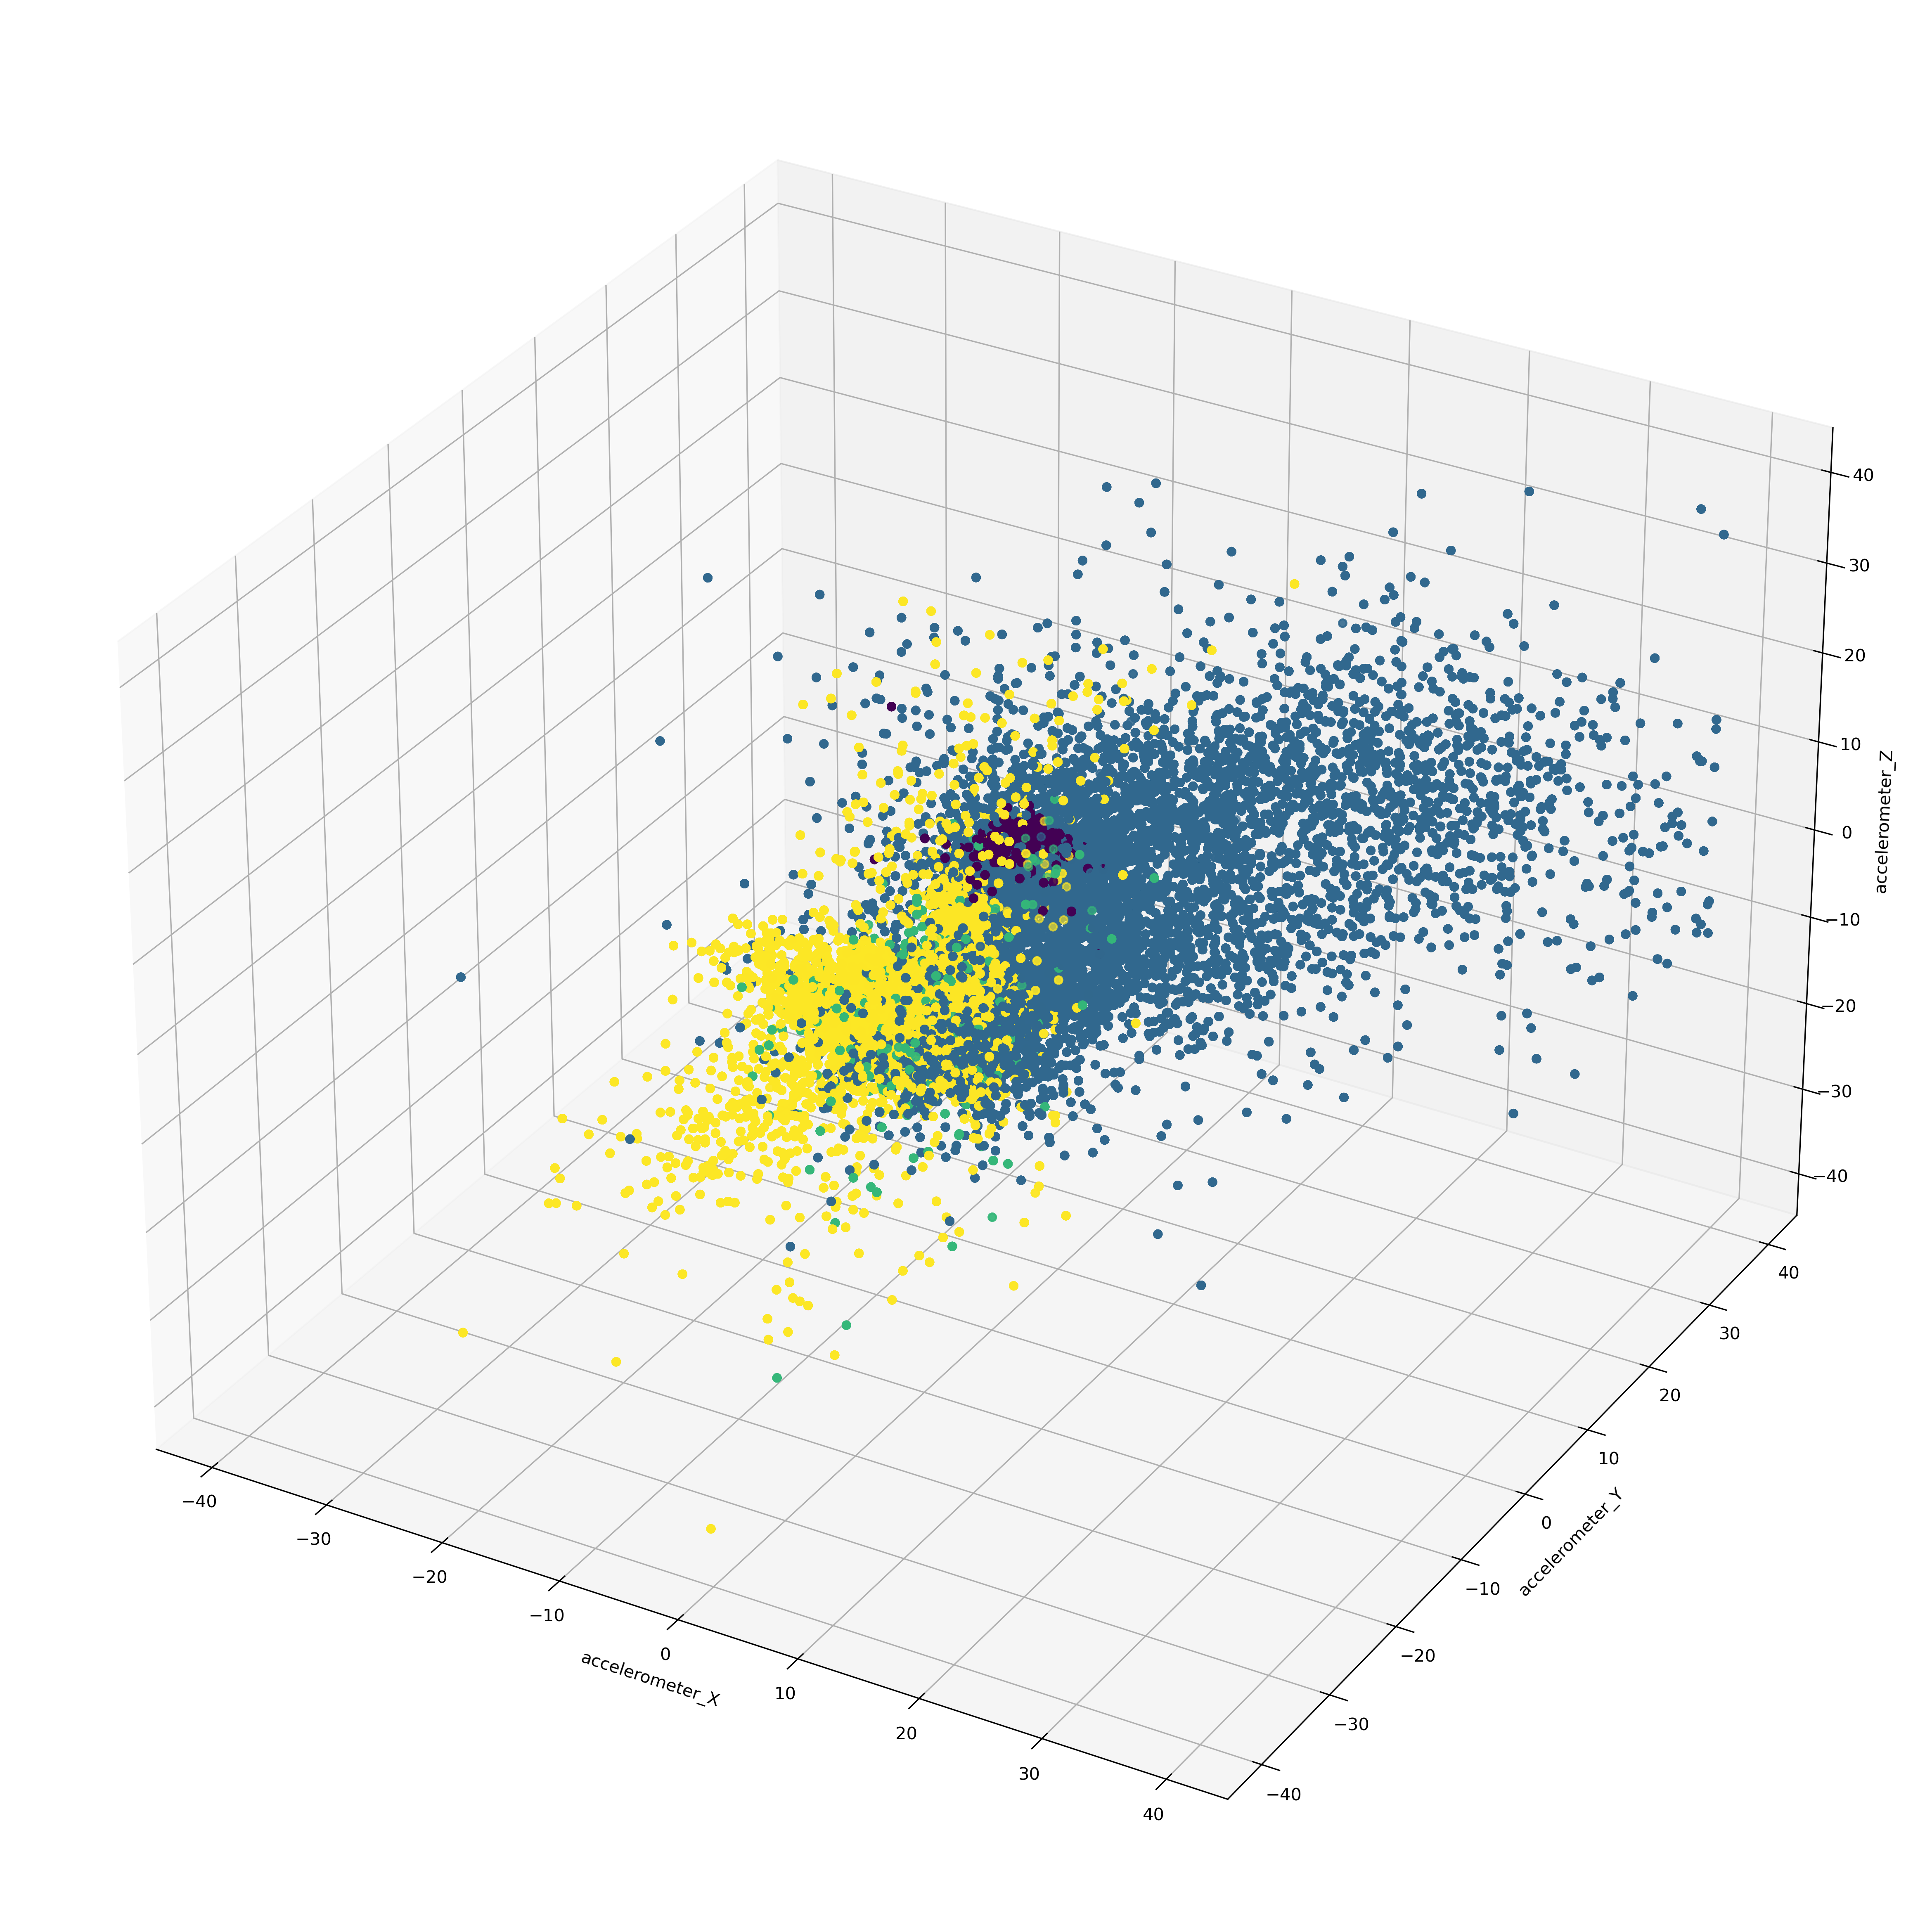

In [19]:
fig = plt.figure(figsize=(20, 20), dpi=300)
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter3D(X['accelerometer_X'], X['accelerometer_Y'], X['accelerometer_Z'], c=y, cmap='viridis')
ax.set_xlabel('accelerometer_X')
ax.set_ylabel('accelerometer_Y')
ax.set_zlabel('accelerometer_Z')

plt.show()

In [20]:
svm_classifier = SVC(kernel='rbf', C=10)
svm_classifier.fit(X_train, y_train)

svm_predictions = svm_classifier.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

print("SVM Classifier Results:")
print("Accuracy:", svm_accuracy)
print("Classification Report:")
print(svm_classification_report)
print("Confusion Matrix:")
print(svm_confusion_matrix)

SVM Classifier Results:
Accuracy: 0.996866295264624
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12374
           1       1.00      1.00      1.00     40827
           2       0.95      0.92      0.94      2014
           3       0.99      1.00      0.99     22329

    accuracy                           1.00     77544
   macro avg       0.99      0.98      0.98     77544
weighted avg       1.00      1.00      1.00     77544

Confusion Matrix:
[[12374     0     0     0]
 [    0 40827     0     0]
 [    0     0  1860   154]
 [    0     0    89 22240]]


In [21]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

print("Random Forest Classifier Results:")
print("Accuracy:", rf_accuracy)
print("Classification Report:")
print(rf_classification_report)
print("Confusion Matrix:")
print(rf_confusion_matrix)

Random Forest Classifier Results:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12374
           1       1.00      1.00      1.00     40827
           2       1.00      1.00      1.00      2014
           3       1.00      1.00      1.00     22329

    accuracy                           1.00     77544
   macro avg       1.00      1.00      1.00     77544
weighted avg       1.00      1.00      1.00     77544

Confusion Matrix:
[[12374     0     0     0]
 [    0 40827     0     0]
 [    0     0  2014     0]
 [    0     0     0 22329]]


Класифікатор SVM досяг точності 0.9966, з високою точністю, відгуком та F1-оцінкою для кожного класу.
Класифікатор Random Forest показав ідеальну точність 1.0, що свідчить про те, що він правильно класифікував всі екземпляри для даного набору даних.
Обидва класифікатори успішно виконали завдання точного передбачення міток активностей на основі даних акселерометра.
Random Forest є швидкою моделлю навчання, оскільки вона базується на розбитті даних на різні дерева. SVM трохи повільніша через обчислювально витратний процес знаходження оптимальної розділяючої гіперплощини.
Отримані результати підтверджують, що класифікатор Random Forest показав трохи кращі результати за точністю та швидкістю порівняно з класифікатором SVM, але обидві моделі проявили високу ефективність у класифікації активностей.